<h1>Problem Statement</h1>

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.
<h1>Dataset Description</h1>

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Analysis Tasks

Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

<h1>How to download kaggle dataset</h1>

import opendatasets as od<br>
od.download("https://www.kaggle.com/vik2012kvs/walmart-dataretail-analysis")

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
dataset=pd.read_csv('Walmart_Store_sales.csv')

In [4]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
dataset.shape 

(6435, 8)

In [6]:
dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [7]:
stores_all=dataset['Store'].value_counts()
stores_all

4     143
2     143
10    143
14    143
18    143
22    143
26    143
30    143
34    143
38    143
42    143
3     143
7     143
11    143
15    143
19    143
23    143
27    143
31    143
35    143
39    143
6     143
45    143
8     143
41    143
12    143
16    143
20    143
24    143
28    143
32    143
36    143
40    143
44    143
1     143
5     143
9     143
13    143
17    143
21    143
25    143
29    143
33    143
37    143
43    143
Name: Store, dtype: int64

In [8]:
dataset['Holiday_Flag'].value_counts() # holidays and non-holidays 

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
dataset.isnull().sum() # no missing data

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<h5>which store has maximum sale?</h5>

In [13]:
store_by_sale=dataset.groupby('Store')['Weekly_Sales']

In [14]:
stores_all
store_sale=dataset.groupby('Store')['Weekly_Sales'].sum()
store_sale_max=store_sale.sort_values(ascending=False) # show all store with their sale in highest to lowest
print(f'Maximum Sale is ${store_sale_max.values[0]} from store_{store_sale_max.keys()[0]}') 

Maximum Sale is $301397792.46000004 from store_20


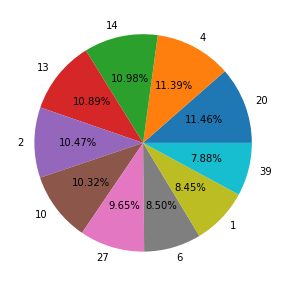

In [15]:
#All Store Sales 
plt.figure(figsize=(20,5))
y=list(store_sale_max.values[0:10])
x=list(store_sale_max.keys()[0:10])
# sns.barplot(data=store_sale_max,y=y,x=x) 
# plt.bar(x,y) 
plt.pie(y,labels=x,autopct='%0.2f%%')
plt.show()

In [16]:
#Top 10 Sales 
top=10
for i in range(top): 
    print(f'Maximum Sale is ${store_sale_max.values[i]} from store_{store_sale_max.keys()[i]}')   

Maximum Sale is $301397792.46000004 from store_20
Maximum Sale is $299543953.38 from store_4
Maximum Sale is $288999911.34000003 from store_14
Maximum Sale is $286517703.80000013 from store_13
Maximum Sale is $275382440.9800001 from store_2
Maximum Sale is $271617713.8899999 from store_10
Maximum Sale is $253855916.88000003 from store_27
Maximum Sale is $223756130.64000002 from store_6
Maximum Sale is $222402808.85000005 from store_1
Maximum Sale is $207445542.46999997 from store_39


<h5>Which store has maximum standard deviation</h5>

In [17]:
store_by_sale.std()
x=store_by_sale.std().sort_values(ascending=False).values[0]
y=store_by_sale.std().sort_values(ascending=False).keys()[0] 
print(f'Maximum Standard Deviation is {x} of Store_{y}')

Maximum Standard Deviation is 317569.9494755081 of Store_14


In [18]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [19]:
dataset['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [20]:
dataset['Date'].value_counts()

30-12-2011    45
01-10-2010    45
20-08-2010    45
21-01-2011    45
26-11-2010    45
              ..
08-06-2012    45
06-07-2012    45
22-04-2011    45
22-10-2010    45
27-05-2011    45
Name: Date, Length: 143, dtype: int64

<h3>Holiday Events Sale</h3>
<p><b>Super Bowl</b>:12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13</p>
<p><b>Labour Day</b>: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13</p>
<p><b>Thanksgiving</b>: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13</p>
<p><b>Christmas</b>: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13</p>

In [21]:
a=dataset[dataset['Date']== '12-02-2010']['Weekly_Sales'].sum()
b=dataset[dataset['Date']== '11-02-2011']['Weekly_Sales'].sum()
c=dataset[dataset['Date']== '10-02-2012']['Weekly_Sales'].sum()
d=dataset[dataset['Date']== '08-02-2013']['Weekly_Sales'].sum() 
super_bowl_sale = a+b+c+d

a1=dataset[dataset['Date']== '10-09-2010']['Weekly_Sales'].sum()
b1=dataset[dataset['Date']== '09-09-2011']['Weekly_Sales'].sum()
c1=dataset[dataset['Date']== '07-09-2012']['Weekly_Sales'].sum()
d1=dataset[dataset['Date']== '06-09-2013']['Weekly_Sales'].sum() 
labour_day_sale = a1+b1+c1+d1

a2=dataset[dataset['Date']== '26-11-2010']['Weekly_Sales'].sum()
b2=dataset[dataset['Date']== '25-11-2011']['Weekly_Sales'].sum()
c2=dataset[dataset['Date']== '23-11-2012']['Weekly_Sales'].sum()
d2=dataset[dataset['Date']== '29-11-2013']['Weekly_Sales'].sum() 
thanks_giving_sale = a2+b2+c2+d2

a3=dataset[dataset['Date']== '31-12-2010']['Weekly_Sales'].sum()
b3=dataset[dataset['Date']== '30-12-2011']['Weekly_Sales'].sum()
c3=dataset[dataset['Date']== '28-12-2012']['Weekly_Sales'].sum()
d3=dataset[dataset['Date']== '27-12-2013']['Weekly_Sales'].sum() 
christmas = a3+b3+c3+d3

print('super_bowl_sale : ',super_bowl_sale)
print('labour_day_sale : ',labour_day_sale)
print('thanks_giving_sale : ',thanks_giving_sale)
print('christmas : ',christmas)

super_bowl_sale :  145682278.34000003
labour_day_sale :  140727684.68
thanks_giving_sale :  132414608.5
christmas :  86474980.04


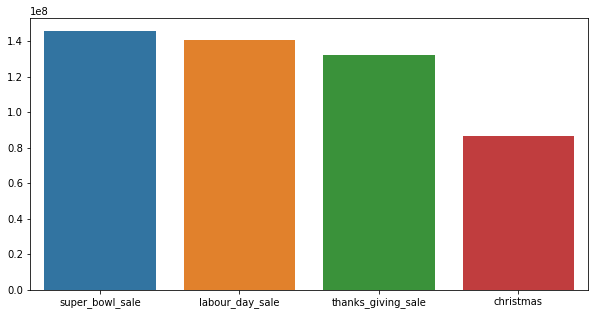

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(['super_bowl_sale','labour_day_sale','thanks_giving_sale','christmas']),y=list([super_bowl_sale,labour_day_sale,thanks_giving_sale,christmas]))
plt.show()

<h5>Which store's has good quarterly growth rate in Q3’2012</h5>

In [23]:
#Quater_3 = Q3 = july-sept

In [24]:
# Date format seperated into year,month and quater
dataset['Date']=pd.to_datetime(dataset['Date'])
monthlysale=dataset.groupby([dataset['Date'],dataset['Store']])['Weekly_Sales'].agg(sum).reset_index()

monthlysale['Year']=monthlysale['Date'].dt.year
monthlysale['Month'] = monthlysale['Date'].dt.month
monthlysale['Quarter'] = monthlysale['Date'].dt.quarter
monthlysale['Date_wise']=monthlysale['Date'].dt.day
monthlysale

,Date,Store,Weekly_Sales,Year,Month,Quarter,Date_wise
0,2010-01-10,1,1453329.50,2010,1,1,10
1,2010-01-10,2,1827440.43,2010,1,1,10
2,2010-01-10,3,358784.10,2010,1,1,10
3,2010-01-10,4,1842821.02,2010,1,1,10
4,2010-01-10,5,283178.12,2010,1,1,10
...,...,...,...,...,...,...,...
6430,2012-12-10,41,1409544.97,2012,12,4,10
6431,2012-12-10,42,612379.90,2012,12,4,10
6432,2012-12-10,43,619369.72,2012,12,4,10
6433,2012-12-10,44,337796.13,2012,12,4,10


In [25]:
monthlysale.head()

,Date,Store,Weekly_Sales,Year,Month,Quarter,Date_wise
0,2010-01-10,1,1453329.50,2010,1,1,10
1,2010-01-10,2,1827440.43,2010,1,1,10
2,2010-01-10,3,358784.10,2010,1,1,10
3,2010-01-10,4,1842821.02,2010,1,1,10
4,2010-01-10,5,283178.12,2010,1,1,10


In [26]:
Q3_Sale_2012=monthlysale[(monthlysale['Quarter'] == 3) & ((monthlysale['Month']<=9) & (monthlysale['Month']>=7)) & (monthlysale['Year']==2012) ]
a=Q3_Sale_2012['Weekly_Sales'].sum()
b=Q3_Sale_2012['Weekly_Sales'].mean()
c=Q3_Sale_2012['Weekly_Sales'].std()
display(HTML(f'<b>Total</b> 3rd-Quaterly Sale in 2012 : <b>$ {round(a,2)}</b>'))
display(HTML(f'<b>Average</b> 3rd-Quaterly Sale in 2012 : <b>$ {round(b,2)}</b>'))
display(HTML(f'<b>Standrd Deviation</b> 3rd-Quaterly Sale in 2012 : <b>$ {round(c,2)}</b>'))

In [27]:
display(HTML("<h6>Which store's has good quarterly growth rate in Q3’2012?</h6>"))
a=Q3_Sale_2012.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).keys()[0]
b=Q3_Sale_2012.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).values[0]
display(HTML(f'<b>Store_{a}</b> , because it have maximum sale in quarter3 2012 which is <b>$ {b}</b>'))

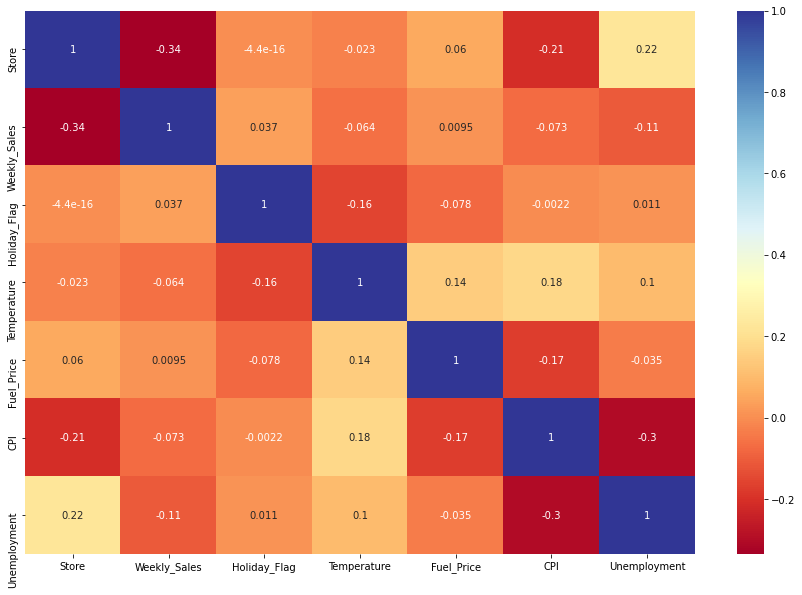

In [28]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='RdYlBu',annot=True)
plt.show()

# Multiple Linear Regression

In [29]:
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [31]:
# dataset=pd.get_dummies(dataset)
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [32]:
dataset.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [33]:
a = pd.get_dummies(dataset['Store']) 
dataset = dataset.drop('Store',axis = 1)
dataset = dataset.join(a)
dataset

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6431,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6432,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
from sklearn.preprocessing import StandardScaler # for normilization data https://i.stack.imgur.com/obywE.png

scaler = StandardScaler()
scaled_temperature = scaler.fit_transform(dataset[['Temperature']]) #scaling the time column
dataset['Temperature'] = scaled_temperature
scaled_Fuel_Price = scaler.fit_transform(dataset[['Fuel_Price']]) #scaling the time column
dataset['Fuel_Price'] = scaled_Fuel_Price
scaled_Unemployment = scaler.fit_transform(dataset[['Unemployment']]) #scaling the time column
dataset['Unemployment'] = scaled_Unemployment

In [49]:
dataset

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,2010-05-02,1643690.90,0,-0.995136,-1.713800,211.096358,0.056964,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,-1.201170,-1.766089,211.242170,0.056964,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,1611968.17,0,-1.124178,-1.840166,211.289143,0.056964,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,-0.760907,-1.737766,211.319643,0.056964,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,1554806.68,0,-0.767955,-1.598328,211.350143,0.056964,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,0.228602,1.390883,192.013558,0.365109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6431,2012-05-10,733455.07,0,0.229144,1.364738,192.170412,0.356046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6432,2012-12-10,734464.36,0,-0.335825,1.397419,192.327265,0.356046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6433,2012-10-19,718125.53,0,-0.227385,1.329879,192.330854,0.356046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
x=dataset.drop(columns=['Weekly_Sales','Date'],axis=1)
y=dataset['Weekly_Sales']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.75,random_state=1)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4826, 50)
(1609, 50)
(4826,)
(1609,)


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model=LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_predict=model.predict(x_test)

In [42]:
from sklearn.metrics import r2_score,mean_squared_error

In [43]:
r2=r2_score(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)
display(HTML(f'<h2>Accurecy is : {round(r2*100,2)} %</h2>'))# It's R square value
print('Mean Square Error :',MSE)

Mean Square Error : 26528305656.300156


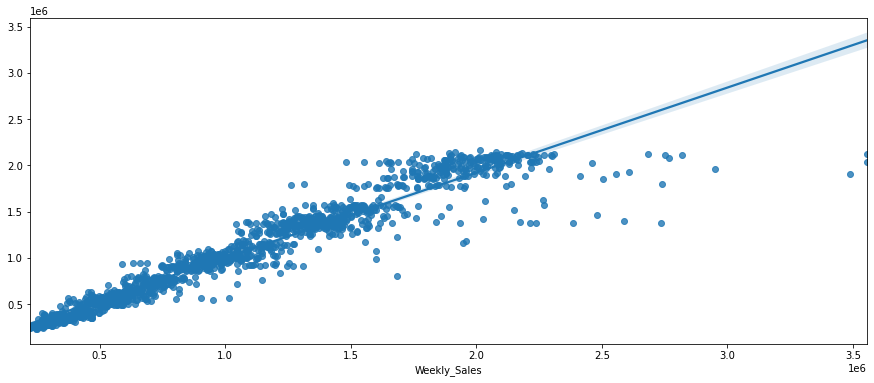

In [44]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_predict) 
plt.show()

In [45]:
y_error=y_test-y_predict
# accurcy=round((y_predict-y_test)*100/y_test,2)

error_data=pd.DataFrame(np.array([y_test,y_predict,y_error])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accurcy%'})
error_data


,Actual,Predicted,Error
0,1870619.23,2.060087e+06,-189467.885929
1,448391.99,5.341555e+05,-85763.494708
2,1272948.27,1.384119e+06,-111171.114377
3,744969.42,7.398869e+05,5082.517110
4,325345.41,3.397094e+05,-14363.950754
...,...,...,...
1604,2411790.21,1.887765e+06,524025.220900
1605,470281.03,3.866665e+05,83614.577578
1606,667151.46,7.743509e+05,-107199.476482
1607,957356.84,8.925789e+05,64777.913698


# Data Accurecy Check with comparing ACTUAL vs PREDICTED

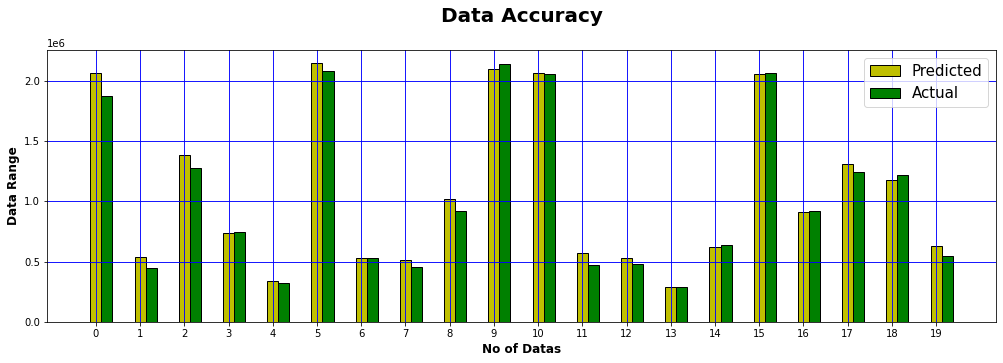

In [46]:
plt.figure(figsize=(17,5))
no_of_data_show =20 # type here how many data you want to show
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'y',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No of Datas",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title("Data Accuracy\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show()

In [47]:
# For Show statistics
import statsmodels.api as si
mod=si.OLS(y_train,x_train)
result=mod.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:50:07   Log-Likelihood:                -64636.
No. Observations:                4826   AIC:                         1.294e+05
Df Residuals:                    4776   BIC:                         1.297e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Holiday_Flag  6.658e+04   9088.331      7.326   

In [48]:
# we will give them whole data y and x
# For Show statistics
import statsmodels.api as si
mod=si.OLS(y,x)
result=mod.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1500.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:50:07   Log-Likelihood:                -86222.
No. Observations:                6435   AIC:                         1.725e+05
Df Residuals:                    6385   BIC:                         1.729e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Holiday_Flag  6.924e+04   7982.452      8.674   